## Set configurations

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

# Attempt at Model 1

In [2]:
#Import packages
import warnings
import importlib
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')
import category_encoders as ce
import os, sys,pandas as pd,json, numpy as np
from datetime import timedelta,datetime as dt, date
import sqlalchemy, matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, recall_score
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn import tree

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
!pip install graphviz

In [4]:
!pip install category_encoders


In [5]:
!pip install pydot


In [6]:
!pip install imblearn

In [7]:
!pip install sklearn

## Read alumni data

In [14]:
alumni_donation = pd.read_csv("/Users/gcdyw9/Documents/alumni_donations.csv")
alumni_donation.head()

,Unnamed: 0,index,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,FIRST_NAME,LAST_NAME,Timestamp,Non-work email,Please select your highest level of education,Undergraduate graduation year,Current zip code,Outlet(s) you worked at,Position(s) you held within the outlet(s) chosen above,Years active at your Mizzou Student Media outlet,Current role and organization,Indicate the opportunities described above that you're interested in pursuing.,form_response,state,zip_avg_income,number_outlets,newsletter_list_flag,mentorship_list_flag,auditing_list_flag,apparel_list_flag,workshop_list_flag,networking_list_flag,homecoming_list_flag,facebook_list_flag,scholarship_list_flag,advisory_list_flag,leadership_list_flag,missouri_list_flag,multiple_outlets_list_flag,current_role_list_flag,affluent_list_flag,engagement_points,engaged_list_flag,PREF_EMAIL_ADDRESS,MEDIA_MADNESS_21_GIVING,MEDIA_MADNESS_22_GIVING,MEDIA_MADNESS_21_FLAG,MEDIA_MADNESS_22_FLAG,lapsed_2021_flag,cmm_donor_flag,target
0,0,AAMER MADHANI,aamermadhani@gmail.com,True,False,False,AAMER,MADHANI,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,aamermadhani@gmail.com,20.0,NaN,True,False,True,True,True
1,1,AARON CARTER,Aaroncarter51298@gmail.com,False,True,True,AARON,CARTER,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0,False,NaN,NaN,NaN,False,False,False,False,False
2,2,AARON CUMMINS,aaroncummins@yahoo.com,False,True,False,AARON,CUMMINS,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,NaN,NaN,NaN,False,False,False,False,False
3,3,AARON LADD,laddaaron0@gmail.com,False,False,True,AARON,LADD,7/13/22 14:37,laddaaron0@gmail.com,Bachelor's Degree,2018,64111,MUTV,MUTV Sports Reporter,2015-2016,KSHB 41 TV,"Becoming a mentor for the mentorship program, ...",True,MO,61.721542,1,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,2,False,NaN,NaN,NaN,False,False,False,False,False
4,4,AARON MORALES,morgan.amgardens@gmail.com,True,False,False,AARON,MORALES,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,NaN,NaN,NaN,False,False,False,False,False


In [15]:
alumni_donation['target'].value_counts(dropna=False)

False    1846
True       36
Name: target, dtype: int64

In [16]:
alumni_donation.columns.values

array(['Unnamed: 0', 'index', 'EMAIL_1', 'MANEATER_ALUM_FLAG',
       'KCOU_ALUM_FLAG', 'MUTV_ALUM_FLAG', 'FIRST_NAME', 'LAST_NAME',
       'Timestamp', 'Non-work email',
       'Please select your highest level of education',
       'Undergraduate graduation year', 'Current zip code',
       'Outlet(s) you worked at',
       'Position(s) you held within the outlet(s) chosen above',
       'Years active at your Mizzou Student Media outlet',
       'Current role and organization',
       "Indicate the opportunities described above that you're interested in pursuing.",
       'form_response', 'state', 'zip_avg_income', 'number_outlets',
       'newsletter_list_flag', 'mentorship_list_flag',
       'auditing_list_flag', 'apparel_list_flag', 'workshop_list_flag',
       'networking_list_flag', 'homecoming_list_flag',
       'facebook_list_flag', 'scholarship_list_flag',
       'advisory_list_flag', 'leadership_list_flag', 'missouri_list_flag',
       'multiple_outlets_list_flag', 'current_

### Target

In [17]:
alumni_donation['target'] = alumni_donation['cmm_donor_flag']

### Defining modeling table

In [18]:
data_model = alumni_donation

In [19]:
data_model.shape

(1882, 47)

### Model build

In [20]:
data_model.columns.values

array(['Unnamed: 0', 'index', 'EMAIL_1', 'MANEATER_ALUM_FLAG',
       'KCOU_ALUM_FLAG', 'MUTV_ALUM_FLAG', 'FIRST_NAME', 'LAST_NAME',
       'Timestamp', 'Non-work email',
       'Please select your highest level of education',
       'Undergraduate graduation year', 'Current zip code',
       'Outlet(s) you worked at',
       'Position(s) you held within the outlet(s) chosen above',
       'Years active at your Mizzou Student Media outlet',
       'Current role and organization',
       "Indicate the opportunities described above that you're interested in pursuing.",
       'form_response', 'state', 'zip_avg_income', 'number_outlets',
       'newsletter_list_flag', 'mentorship_list_flag',
       'auditing_list_flag', 'apparel_list_flag', 'workshop_list_flag',
       'networking_list_flag', 'homecoming_list_flag',
       'facebook_list_flag', 'scholarship_list_flag',
       'advisory_list_flag', 'leadership_list_flag', 'missouri_list_flag',
       'multiple_outlets_list_flag', 'current_

In [21]:
input_list=[#'index', 'EMAIL_1', 
            'MANEATER_ALUM_FLAG', 'KCOU_ALUM_FLAG',
       'MUTV_ALUM_FLAG', #'FIRST_NAME', 'LAST_NAME', 'Timestamp',
      # 'Non-work email', 
    #'Please select your highest level of education',
      # 'Undergraduate graduation year', 'Current zip code',
      # 'Outlet(s) you worked at',
      # 'Position(s) you held within the outlet(s) chosen above',
#        'Years active at your Mizzou Student Media outlet',
#        'Current role and organization',
#        "Indicate the opportunities described above that you're interested in pursuing.",
       'form_response', 'state', 'zip_avg_income', 'number_outlets',
       'newsletter_list_flag', 'mentorship_list_flag',
       'auditing_list_flag', 'apparel_list_flag', 'workshop_list_flag',
       'networking_list_flag', 'homecoming_list_flag',
       'facebook_list_flag', 'scholarship_list_flag',
       'advisory_list_flag', 'leadership_list_flag', 'missouri_list_flag',
       'multiple_outlets_list_flag', 'current_role_list_flag',
       'affluent_list_flag', 'engagement_points', 'engaged_list_flag',
      # 'PREF_EMAIL_ADDRESS', 
#     'MEDIA_MADNESS_21_GIVING',
#        'MEDIA_MADNESS_22_GIVING', 'MEDIA_MADNESS_21_FLAG',
#        'MEDIA_MADNESS_22_FLAG', 'lapsed_2021_flag', 'cmm_donor_flag',
     #  'target'
]

In [22]:
len(input_list)

24

In [23]:
X = data_model[input_list]

In [24]:
y = data_model['target'].astype(int).fillna(0)

In [25]:
from collections import Counter
Counter(y)

Counter({1: 36, 0: 1846})

### Data partition

In [26]:
sss=StratifiedShuffleSplit(n_splits=1,train_size=0.8,random_state=187)

In [27]:
for train_index,test_index in sss.split(X,y):
    X_train,y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]






































#### One Hot Encoding

In [28]:
ohe = ce.OneHotEncoder(use_cat_names=True)
trainXohe = ohe.fit_transform(X_train).fillna(0)
testXohe = ohe.transform(X_test).fillna(0)

In [29]:
trainXohe.shape

(1505, 46)

In [30]:
y_train.sum()

29

In [31]:
trainXohe.head()

,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,form_response,state_nan,state_PA,state_GA,state_MO,state_KS,state_IL,state_MN,state_CT,state_NY,state_MD,state_VA,state_MI,state_TN,state_TX,state_CA,state_WI,state_NC,state_CO,state_WA,state_FL,state_MA,state_DC,state_SC,zip_avg_income,number_outlets,newsletter_list_flag,mentorship_list_flag,auditing_list_flag,apparel_list_flag,workshop_list_flag,networking_list_flag,homecoming_list_flag,facebook_list_flag,scholarship_list_flag,advisory_list_flag,leadership_list_flag,missouri_list_flag,multiple_outlets_list_flag,current_role_list_flag,affluent_list_flag,engagement_points,engaged_list_flag
1838,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False
546,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False
1807,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False
1725,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False
1016,True,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False


#### Train Model 1 (explainability)

Counter({0: 1846, 1: 36})
Counter({0: 116, 1: 29})
  Train Recall Score: 0.13793103448275862
  Train AUC: 0.5646551724137931
  Test Recall Score: 0.14285714285714285
  Test AUC: 0.5673745173745174


<AxesSubplot:>

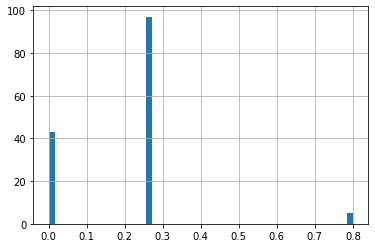

In [32]:
from imblearn.under_sampling import RandomUnderSampler  
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy=.25)
# summarize class distribution
print(Counter(y))
# fit and apply the transform
X_over, y_over = undersample.fit_resample(trainXohe, y_train)
# summarize class distribution
print(Counter(y_over))


def eval_metrics(actual,pred):
    recall=recall_score(actual,pred)
    auc=roc_auc_score(actual,pred)
    return recall, auc  

#Train/Fit
dtc = DecisionTreeClassifier(
  max_depth = 4,
    min_samples_leaf=5,
)
#X_over=trainXohe
#y_over=y_train
dtc.fit(X_over, y_over)

# Predict
y_train_pred = dtc.predict(X_over)

(train_recall, train_auc) = eval_metrics(y_over, y_train_pred)

print(f"  Train Recall Score: {train_recall}")
print(f"  Train AUC: {train_auc}")

# Predict
y_test_pred = dtc.predict(testXohe)

(test_recall, test_auc) = eval_metrics(y_test, y_test_pred)

print(f"  Test Recall Score: {test_recall}")
print(f"  Test AUC: {test_auc}") 

pd.Series(dtc.predict_proba(X_over)[:,1]).hist(bins=50)

In [33]:
#dtc.fit(trainXohe[['student_mean_amount']], y_train)

In [34]:
dot_data = StringIO()
export_graphviz(dtc, 
                out_file=dot_data, 
                rounded=True,
                filled=True,
                #feature_names=trainXohe[['student_mean_amount']].columns.values
                feature_names = X_over.columns.values
               )
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
y_pred=dtc.predict(trainXohe)

In [ ]:
churned = np.array(y_train)#.argmax(axis=1)
predictions = np.array(y_pred)#.argmax(axis=1)
confusion_matrix(churned, predictions)

In [ ]:
print(classification_report(churned,predictions))

#### Predict Test Set

In [ ]:
y_pred=dtc.predict(testXohe)

In [ ]:
churned = np.array(y_test)#.argmax(axis=1)
predictions = np.array(y_pred)#.argmax(axis=1)
confusion_matrix(churned, predictions)

In [ ]:
print(classification_report(churned,predictions))

! pip freeze

!pip install gprof2dot

!pip install graphviz

In [ ]:
! sudo apt-get install graphviz

!pip install dot

brew install gprof2dot